<a href="https://colab.research.google.com/github/jen0525/AIFFEL_quest_cr/blob/master/Exploration/Ex7/Ex7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🐣 CIFAR-10 데이터로 모델 하이퍼파라미터 튜닝부터 배포까지**

## **0. 모델 고정해서 사용하기**

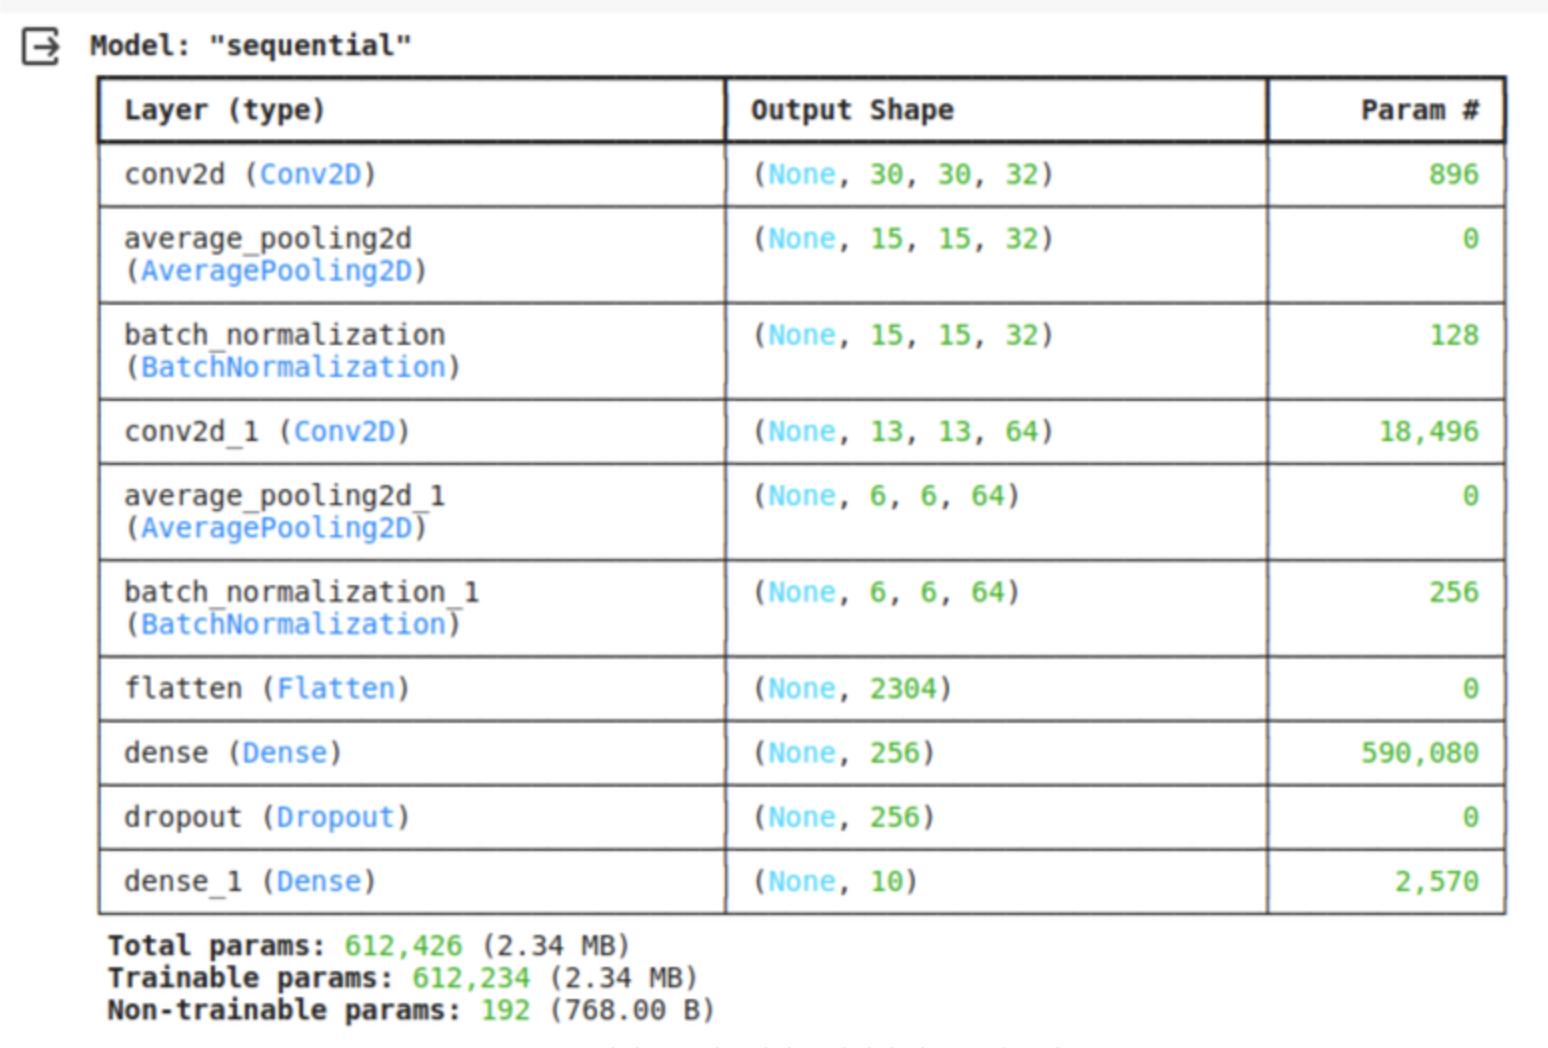

In [ ]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, AveragePooling2D, BatchNormalization,
    Flatten, Dense, Dropout
)

# CIFAR-10 이미지 크기: (32, 32, 3)
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 모델 요약 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 15, 15, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# !pip install tensorflow

##**1. Data Centric AI 맛보기** (오류 라벨 수정)

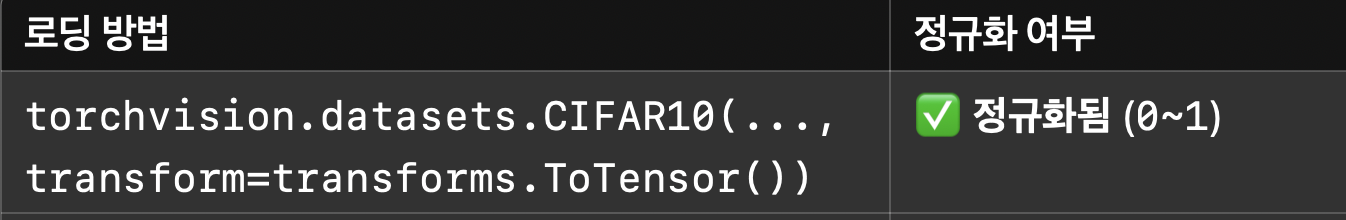

이미 정규화 처리가 되어있기에 전처리 단계에서 정규화 하지 말것 !!

100%|██████████| 170M/170M [00:05<00:00, 28.6MB/s]


CIFAR10 테스트셋 로드 완료: 10000개

🔧 22개 라벨 수정 적용 중...


<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 48296 (\N{HANGUL SYLLABLE BEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-3-03b4701b19f4>:75: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/

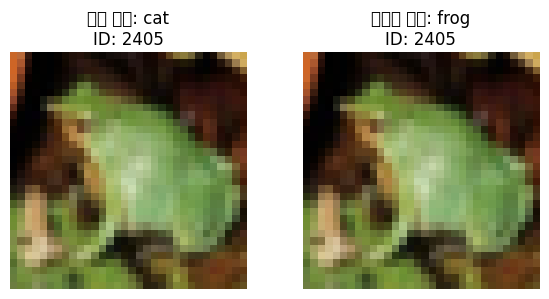

 - ID 2405: cat → frog


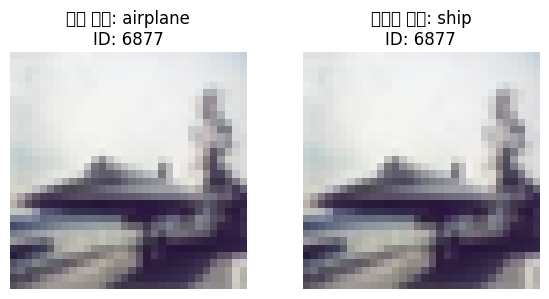

 - ID 6877: airplane → ship


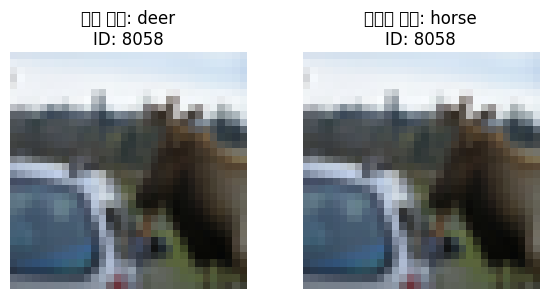

 - ID 8058: deer → horse


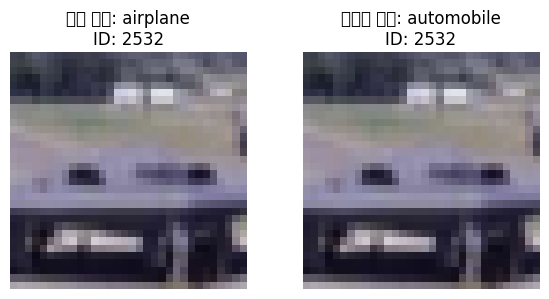

 - ID 2532: airplane → automobile


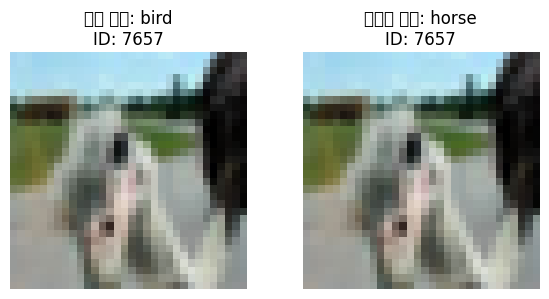

 - ID 7657: bird → horse


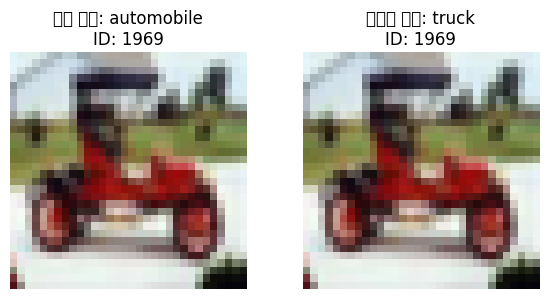

 - ID 1969: automobile → truck


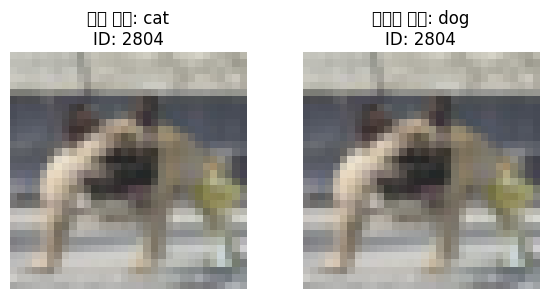

 - ID 2804: cat → dog


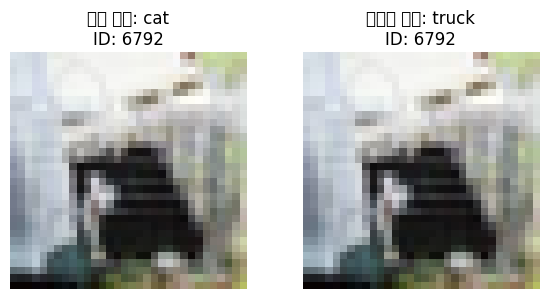

 - ID 6792: cat → truck


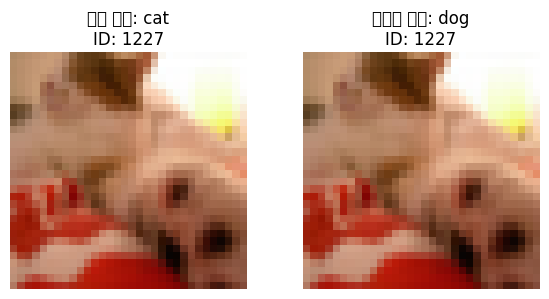

 - ID 1227: cat → dog


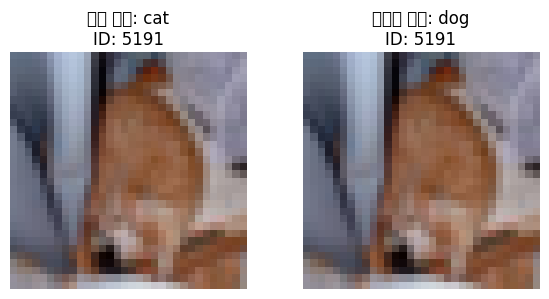

 - ID 5191: cat → dog


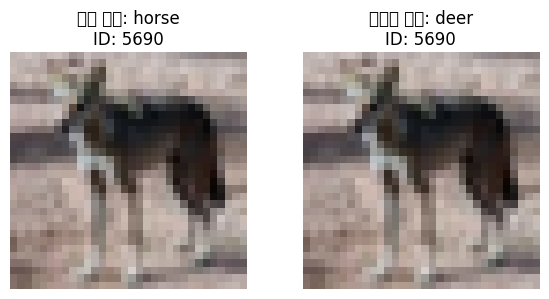

 - ID 5690: horse → deer


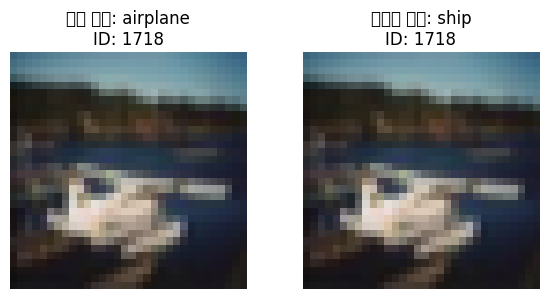

 - ID 1718: airplane → ship


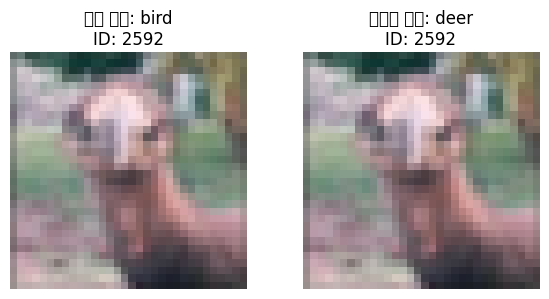

 - ID 2592: bird → deer


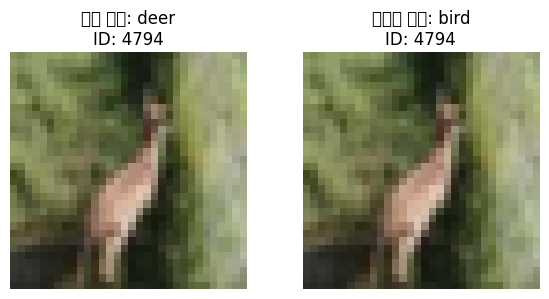

 - ID 4794: deer → bird


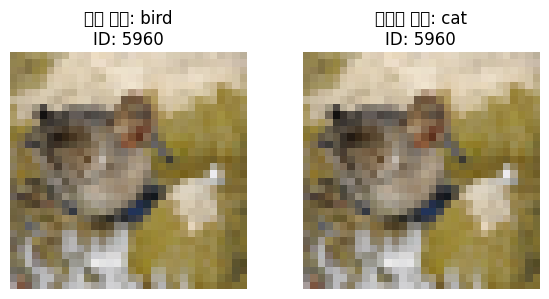

 - ID 5960: bird → cat


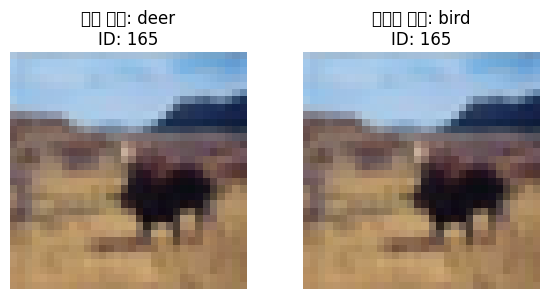

 - ID 165: deer → bird


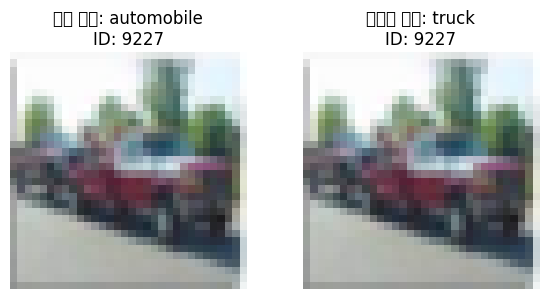

 - ID 9227: automobile → truck


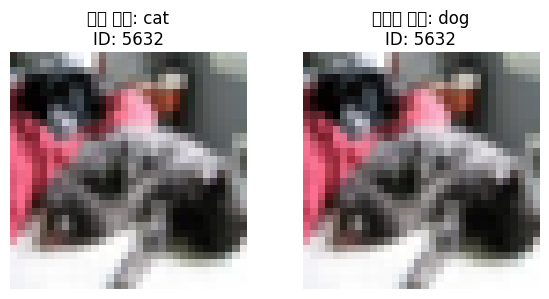

 - ID 5632: cat → dog


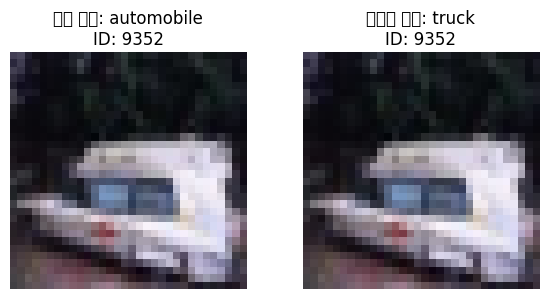

 - ID 9352: automobile → truck


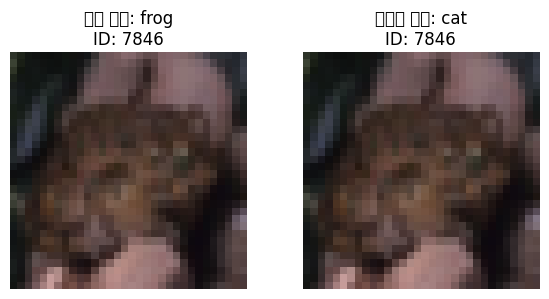

 - ID 7846: frog → cat


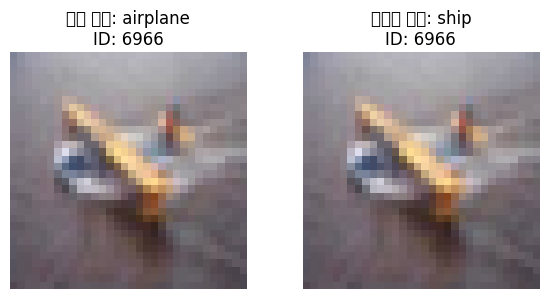

 - ID 6966: airplane → ship


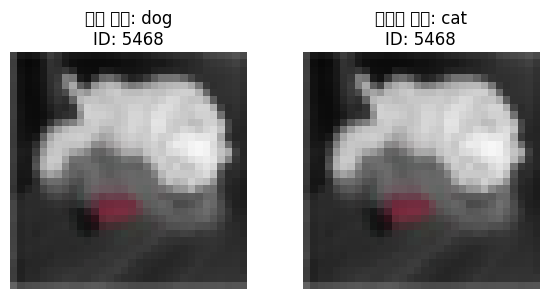

 - ID 5468: dog → cat

 전체 수정된 CIFAR-10 데이터셋 저장 완료 → 'cifar10_corrected_full.npz'
총 샘플 수: 10000개


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm

# CIFAR10 클래스 이름
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

# labelerrors.com에서 확인한 라벨 오류 목록
label_errors_22 = [
    {"id": 2405, "original_label": 3, "suggested_label": 6},
    {"id": 6877, "original_label": 0, "suggested_label": 8},
    {"id": 8058, "original_label": 4, "suggested_label": 7},
    {"id": 2532, "original_label": 0, "suggested_label": 1},
    {"id": 7657, "original_label": 2, "suggested_label": 7},
    {"id": 1969, "original_label": 1, "suggested_label": 9},
    {"id": 2804, "original_label": 3, "suggested_label": 5},
    {"id": 6792, "original_label": 3, "suggested_label": 9},
    {"id": 1227, "original_label": 3, "suggested_label": 5},
    {"id": 5191, "original_label": 3, "suggested_label": 5},
    {"id": 5690, "original_label": 7, "suggested_label": 4},
    {"id": 1718, "original_label": 0, "suggested_label": 8},
    {"id": 2592, "original_label": 2, "suggested_label": 4},
    {"id": 4794, "original_label": 4, "suggested_label": 2},
    {"id": 5960, "original_label": 2, "suggested_label": 3},
    {"id": 165,  "original_label": 4, "suggested_label": 2},
    {"id": 9227, "original_label": 1, "suggested_label": 9},
    {"id": 5632, "original_label": 3, "suggested_label": 5},
    {"id": 9352, "original_label": 1, "suggested_label": 9},
    {"id": 7846, "original_label": 6, "suggested_label": 3},
    {"id": 6966, "original_label": 0, "suggested_label": 8},
    {"id": 5468, "original_label": 5, "suggested_label": 3},
]

def load_cifar10():
    transform = transforms.Compose([transforms.ToTensor()])
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    print(f"CIFAR10 테스트셋 로드 완료: {len(testset)}개")
    return testset

def correct_labels(testset, label_errors):
    images = []
    labels = []

    for i in range(len(testset)):
        img, label = testset[i]
        images.append(img.numpy())
        labels.append(label)

    labels = np.array(labels)

    print("\n🔧 22개 라벨 수정 적용 중...")
    for err in label_errors:
        idx = err["id"]
        original = err["original_label"]
        new = err["suggested_label"]

        # 시각화
        img_tensor, _ = testset[idx]
        img_np = np.transpose(img_tensor.numpy(), (1, 2, 0))  # CHW → HWC

        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plt.imshow(img_np)
        plt.title(f"원본 라벨: {CIFAR10_CLASSES[original]}\nID: {idx}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(img_np)
        plt.title(f"수정된 라벨: {CIFAR10_CLASSES[new]}\nID: {idx}")
        plt.axis("off")

        plt.tight_layout()
        plt.show()

        print(f" - ID {idx}: {CIFAR10_CLASSES[original]} → {CIFAR10_CLASSES[new]}")
        labels[idx] = new  # 라벨 수정

    return np.array(images), labels

def save_corrected_dataset(images, labels, filename="cifar10_corrected_full.npz"):
    np.savez(filename,
             images=images,
             labels=labels)

    print(f"\n 전체 수정된 CIFAR-10 데이터셋 저장 완료 → '{filename}'")
    print(f"총 샘플 수: {len(labels)}개")

def main():
    testset = load_cifar10()
    images, labels = correct_labels(testset, label_errors_22)
    save_corrected_dataset(images, labels)

if __name__ == "__main__":
    main()

## **2. 하이퍼파라미터 튜닝**
위에 있는 모델을 기반으로 KerasTuner로 하이퍼파라미터 튜닝을 진행합니다. 튜닝한 하이퍼 파라미터로 학습을 진행하고 모델을 SavedModel 형식으로 저장해주세요.

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
# STEP 1. 데이터 불러오기 & 전처리
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

# 수정된 라벨 데이터셋 불러오기
data = np.load("cifar10_corrected_full.npz")
images = data['images']         # shape: (10000, 3, 32, 32)
labels = data['labels']         # shape: (10000,)

# 채널 순서 변경 (CHW → HWC)
images = np.transpose(images, (0, 2, 3, 1))  # (10000, 32, 32, 3)

# # 정규화
# images = images.astype("float32") / 255.0 # 정규화 하지말것 !!!!!

# one-hot 인코딩
num_classes = 10
y_all = to_categorical(labels, num_classes=num_classes)

# 학습/검증/테스트 데이터 나누기 (예: 70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(images, y_all, test_size=0.3, random_state=42)
X_val, x_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 확인
print(f"훈련 세트: {X_train.shape}, {y_train.shape}")
print(f"검증 세트: {X_val.shape}, {y_val.shape}")
print(f"테스트 세트: {x_test.shape}, {y_test.shape}")

훈련 세트: (7000, 32, 32, 3), (7000, 10)
검증 세트: (1500, 32, 32, 3), (1500, 10)
테스트 세트: (1500, 32, 32, 3), (1500, 10)


In [ ]:
print(" 픽셀값 범위:", images.min(), "to", images.max())
print(" 0번 이미지 평균값:", images[0].mean())

 픽셀값 범위: 0.0 to 1.0
 0번 이미지 평균값: 0.42504343


In [ ]:
# STEP 2. 모델 구조 정의
# 위에서 이미 모델을 정의했지만, 기존 CNN 모델 구조를 함수로 정의 (튜닝 시 반복 생성 가능하게 하기 위함)

import tensorflow as tf
from tensorflow.keras import layers, models

def base_model():
    model = tf.keras.Sequential([
        layers.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [ ]:
import keras_tuner as kt

class DeepTuner(kt.Tuner):
    def run_trial(self, trial, X, y, validation_data, **fit_kwargs):
        model = self.hypermodel.build(trial.hyperparameters)
        model.fit(X, y, batch_size=trial.hyperparameters.Choice(
            'batch_size', [16, 32]), **fit_kwargs)


        X_val, y_val = validation_data
        eval_scores = model.evaluate(X_val, y_val)
        print('test', model.metrics_names)
        print('test',eval_scores)
        return {name: value for name, value in zip(
            model.metrics_names,
            eval_scores)}

In [ ]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=X_train.shape[1:], name='inputs'))

    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(tf.keras.layers.Conv2D(
            hp.Int(f'units_{i}', min_value=32, max_value=256, step=16),
            (3, 3),
            activation='relu',
            padding='same'
        ))

    model.add(tf.keras.layers.Flatten())

    for i in range(hp.Int('n_connections', 1, 3)):
        model.add(tf.keras.layers.Dense(
            hp.Choice(f'n_nodes', values=[64, 128, 256, 512]),
            activation='relu'
        ))

    model.add(tf.keras.layers.Dense(10, activation='softmax', name='outputs'))

    #  옵티마이저와 러닝레이트도 하이퍼파라미터로 지정
    optimizer_name = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    if optimizer_name == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
my_keras_tuner = DeepTuner(
    oracle=kt.oracles.BayesianOptimizationOracle(
        # objective=kt.Objective('accuracy', 'max'),
        objective=kt.Objective('compile_metrics', 'max'),
        max_trials=10,  #### 이부분을 조절하면 실험 횟수를 조절할수있습니다 #####
        seed=42),
    hypermodel=build_model,
    overwrite=True,
    project_name='my_keras_tuner')

# 해당 모델 학습시간은 약 10분정도 걸립니다!
my_keras_tuner.search(
    X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Trial 10 Complete [00h 00m 11s]
compile_metrics: 0.46133333444595337

Best compile_metrics So Far: 0.5213333368301392
Total elapsed time: 00h 07m 07s


In [ ]:
best_hps = my_keras_tuner.get_best_hyperparameters(num_trials=20)[0]
model = build_model(best_hps)
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_38 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,268,618 (16.28 MB)

 Trainable params: 4,268,618 (16.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(f"optimizer: {best_hps.get('optimizer')}")
print(f"learning_rate: {best_hps.get('learning_rate')}")
print(f"batch_size: {best_hps.get('batch_size')}")
print(f"num_layers: {best_hps.get('num_layers')}")
print(f"units in each conv: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}")
print(f"n_connections: {best_hps.get('n_connections')}")
print(f"n_nodes: {best_hps.get('n_nodes')}")

optimizer: rmsprop
learning_rate: 0.000505466655750672
batch_size: 16
num_layers: 7
units in each conv: [32, 32, 32, 32, 32, 32, 32]
n_connections: 2
n_nodes: 128


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    batch_size=best_hps.get('batch_size'),
    epochs=30,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]  # ← 여기에 쓰려면 위에서 정의돼 있어야 해!
)

Epoch 1/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.2589 - loss: 2.1532 - val_accuracy: 0.4227 - val_loss: 1.6127
Epoch 2/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4733 - loss: 1.4673 - val_accuracy: 0.4653 - val_loss: 1.5209
Epoch 3/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5841 - loss: 1.1795 - val_accuracy: 0.4780 - val_loss: 1.5261
Epoch 4/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.6706 - loss: 0.9302 - val_accuracy: 0.4973 - val_loss: 1.4861
Epoch 5/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7772 - loss: 0.6400 - val_accuracy: 0.5033 - val_loss: 1.6677
Epoch 6/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8633 - loss: 0.4178 - val_accuracy: 0.5120 - val_loss: 1.8531
Epoch 7/30
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9268 - loss: 0.2334 - val_accuracy: 0.4773 - val_loss: 2.2305


In [ ]:
model.evaluate(x_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4921 - loss: 1.5013


[1.5252209901809692, 0.4886666536331177]

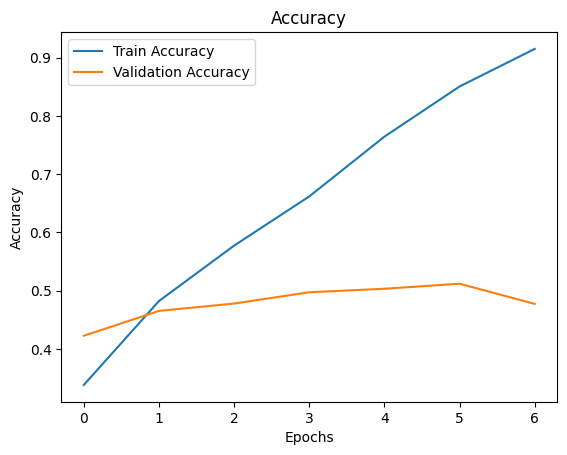

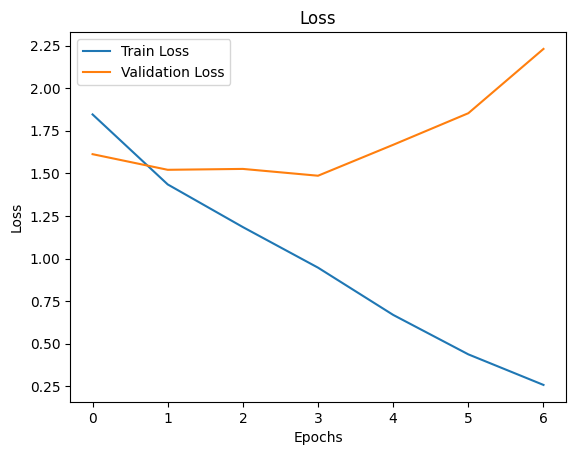

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 과적합 때문에 형편없는 accuracy지만 시간이 없으니 제가 데려가겠습니다. 하...

In [ ]:
import os
from google.colab import drive

# STEP 1. 구글 드라이브 마운트
drive.mount('/content/drive')

# STEP 2. 저장 경로 설정 (원하는 위치로 바꿔도 됨)
save_path = '/content/drive/MyDrive/aiffel/mlops/best_model/1'

# STEP 3. 디렉토리 생성 (없으면 새로 만듦)
os.makedirs(save_path, exist_ok=True)

# STEP 4. 모델 저장
fname = os.path.join(save_path, 'model')
model.export(fname)

fname2 = os.path.join(save_path, 'model.keras')
model.save(fname2)

print(f"모델이 다음 위치에 저장되었습니다:\n- SavedModel: {fname}\n- Keras: {fname2}")

Mounted at /content/drive
Saved artifact at '/content/drive/MyDrive/aiffel/mlops/best_model/1/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='inputs')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138879593421840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006654544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006652048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006655312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006655120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006651088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006652816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006650704: TensorSpec(shape=(), dtype=tf.resource, name=None)
모델이 다음 위치에 저장되었습니다:
- SavedModel: /content/drive/MyDrive/aiffel/mlops/best_model/1/model
- Keras: /

In [ ]:
!mkdir -p /content/drive/MyDrive/aiffel/mlops/best_model/1

In [ ]:
import shutil

# 압축될 파일 이름 (확장자 제외), 'zip' 형식, 압축 대상 폴더 경로
shutil.make_archive('/content/drive/MyDrive/aiffel/mlops/best_model_1',  # 저장될 압축 파일 (확장자 제외)
                    'zip',  # 압축 형식
                    '/content/drive/MyDrive/aiffel/mlops/best_model/1')  # 압축 대상 디렉토리

'/content/drive/MyDrive/aiffel/mlops/best_model_1.zip'

# TFLite

In [ ]:
load_path = '/content/drive/MyDrive/aiffel/mlops/best_model/1/model.keras'
model = tf.keras.models.load_model(load_path)

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 112)    │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 32, 32, 240)    │       242,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 245760)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │    15,728,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,923,952 (182.82 MB)

 Trainable params: 15,974,650 (60.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,949,302 (121.88 MB)

📛 문제는 Flatten → Dense 구간에서 생기는 엄청난 파라미터 폭발!!!!!!

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpbv_pr37l'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='inputs')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138881122514128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138881122512208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138881122516624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138881122516816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006651664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006649168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006646864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138882006662608: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

classify_lite = interpreter.get_signature_runner('serving_default')
print(classify_lite)

{'serving_default': {'inputs': ['inputs'], 'outputs': ['output_0']}}


In [ ]:
!pip install fastapi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import tensorflow as tf

# CIFAR-10 클래스 이름
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

# 모델 로드
load_path = '/content/drive/MyDrive/aiffel/mlops/best_model/1/model.keras'
model = tf.keras.models.load_model(load_path)

app = FastAPI()

# 입력 스키마 정의 (32x32x3 배열, RGB 이미지)
class InputData(BaseModel):
    image: list  # shape: [32][32][3], RGB 이미지

@app.post("/predict")
def predict(data: InputData):
    # 입력 데이터를 numpy 배열로 변환
    img = np.array(data.image, dtype=np.float32)

    # 입력 shape 검증
    if img.shape != (32, 32, 3):
        return {"error": "입력 이미지 shape는 (32, 32, 3)이어야 합니다."}

    # 배치 차원 추가 및 정규화 (0~255 → 0~1)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # (1, 32, 32, 3)

    # 예측
    pred = model.predict(img)
    predicted_class_idx = int(np.argmax(pred[0]))
    predicted_class_name = CIFAR10_CLASSES[predicted_class_idx]
    confidence = float(np.max(pred[0]))

    return {
        "prediction_index": predicted_class_idx,
        "prediction_class": predicted_class_name,
        "confidence": confidence
    }

In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
!ngrok config add-authtoken 2ZqtCc5YdpVlQ8L4xTsEUfhCmtt_dqaC9SPiqCt2MjDGhYJx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import nest_asyncio
import uvicorn
from pyngrok import ngrok

# Colab에서 중복 event loop 방지
nest_asyncio.apply()

# ngrok URL 만들기
public_url = ngrok.connect(8000)
print(f"Your app is live at: {public_url}")

# 서버 실행
uvicorn.run(app, host="0.0.0.0", port=8000)

INFO:     Started server process [1041]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


Your app is live at: NgrokTunnel: "https://11da-34-90-197-252.ngrok-free.app" -> "http://localhost:8000"




민유경 후기: 너무나 당황스럽게도 전세계의 모든 사물은 '고양이'로 통칭되는 결과값이 나왔다. 잘못 라벨링된 이미지를 재분류하여 제대로 기능할 수 있게 한다는 점은 흥미로왔으나 성공하지 못하였다.... 내가 이루고자 하는 과정에서 내가 사용하는 도구가 어떻게 기능하는지 보다 분명히 파악하고 활용하는 연습이 더 필요하겠다. 아자자..!

모델의 혼동 행렬에서 모든 예측이 "고양이(cat)"로 나타나고 있다는 것은 모델이 "고양이" 클래스에만 매우 높은 확률을 부여하고 있으며, 다른 클래스에 대한 인식이 전혀 이루어지지 않고 있다는 것을 의미합니다.

#해석 방법 <br>
1. 모델의 편향:

모델이 "고양이" 클래스에만 치우친 예측을 하고 있습니다. 이는 훈련 데이터에서 "고양이" 예제가 다른 클래스에 비해 더 많거나, 모델이 "고양이"에 특화된 특성을 과도하게 학습했음을 나타냅니다.

2. 데이터셋 불균형:

훈련 데이터셋의 클래스 분포를 확인해야 합니다. 특정 클래스(여기서는 "고양이")의 데이터가 많고, 다른 클래스의 데이터가 적다면, 모델이 "고양이"를 자주 예측하는 경향이 생길 수 있습니다.

3. 모델의 복잡성 부족:

모델이 충분한 복잡성을 갖추지 못해 다양한 클래스의 특성을 학습하지 못했을 수 있습니다. 더 깊거나 복잡한 모델을 시도해 볼 필요가 있습니다.

#개선 방안 <br>
1. 데이터셋 점검:

각 클래스의 샘플 수를 확인하고, 필요하다면 데이터 증강(data augmentation)을 통해 적은 클래스의 데이터를 늘립니다.

2. 모델 재학습:

모델의 구조를 변경하거나 하이퍼파라미터를 조정하여 모델을 재학습합니다. 예를 들어, 더 많은 레이어를 추가하거나, 오버피팅을 방지하기 위한 정규화 기법을 사용할 수 있습니다.

3. 전이 학습(Transfer Learning):

사전 훈련된 모델을 사용하여 "고양이" 외의 클래스를 학습할 수 있습니다. 이를 통해 더 나은 성능을 얻을 수 있습니다.

4. 혼동 행렬 분석:

모델의 예측이 잘못된 클래스에 대해 추가적인 분석을 진행하여, 어떤 특성이 모델의 예측을 방해하는지 파악합니다.



허재은 회고: 모델 튜닝에 집중하고 훈련시키느냐 도커에 올려보고 싶었는데 거기까지 올리지 못했다. 너무 아쉽다 흑

윤원 회고: 전처리 시에 잘못된 라벨을 찾아내는 부분의 자동화/ 하이퍼 파라메터 튜닝의 자동화 진정으로 모델을 학습시키기 위해 필요한 부분들을 배운게 아닌가 싶습니다.